 Enter Person's data below :
Pregnancies: 23
Glucose: 23
Blood Pressure: 45
Skin Thickness: 12
Insulin: 43
BMI: 56
Diabetes Pedigree Function: 44
Age: 23

 Result:  Negative : This person is Not Diabetic
Prediction Confidence: 36.00%

 Note: Great! You're in the clear for now. Still, keep up with a healthy routine—prevention is better than cure! 


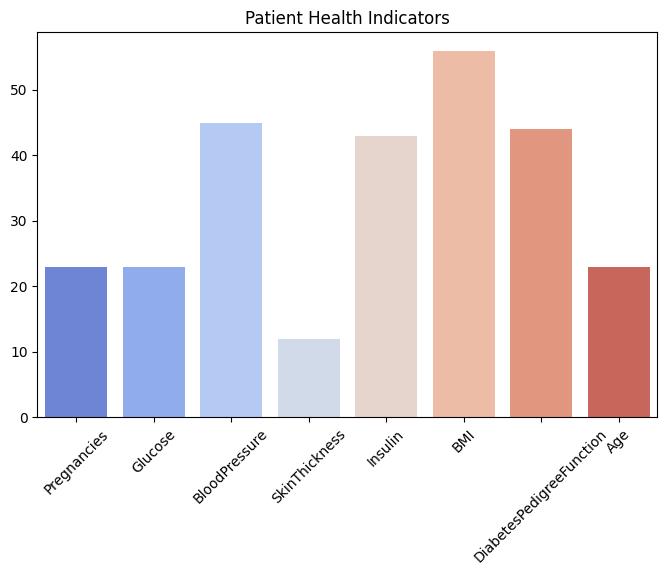

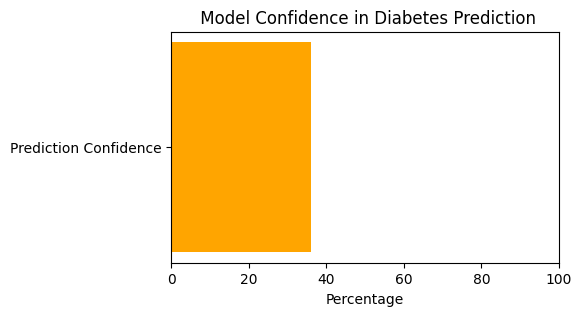

In [11]:
# Diabetes Prediction with Machine Learning

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")


url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, names=cols)

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = RandomForestClassifier()
model.fit(X_train, y_train)


print(" Enter Person's data below :")
user_data = {
    'Pregnancies': float(input("Pregnancies: ")),
    'Glucose': float(input("Glucose: ")),
    'BloodPressure': float(input("Blood Pressure: ")),
    'SkinThickness': float(input("Skin Thickness: ")),
    'Insulin': float(input("Insulin: ")),
    'BMI': float(input("BMI: ")),
    'DiabetesPedigreeFunction': float(input("Diabetes Pedigree Function: ")),
    'Age': float(input("Age: "))
}

user_df = pd.DataFrame([user_data])
scaled_input = scaler.transform(user_df)


prediction = model.predict(scaled_input)[0]
probability = model.predict_proba(scaled_input)[0][1] * 100



if prediction == 1:

    result = " Positive : This Person is Likely Diabetic"
    note = ("Don't worry !  With timely care, proper diet, and regular exercise, "
            "you can live a healthy life. This prediction is just a guide—"
            "always consult a doctor for proper diagnosis. ")
else:
    result = " Negative : This person is Not Diabetic"
    note = ("Great! You're in the clear for now. Still, keep up with a healthy routine—"
            "prevention is better than cure! ")


print(f"\n Result: {result}")
print(f"Prediction Confidence: {probability:.2f}%")
print(f"\n Note: {note}")


plt.figure(figsize=(8, 5))
sns.barplot(x=list(user_data.keys()), y=list(user_data.values()), palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Patient Health Indicators")
plt.show()


plt.figure(figsize=(5,3))
plt.barh(["Prediction Confidence"], [probability], color="orange")
plt.xlim(0,100)
plt.title(" Model Confidence in Diabetes Prediction")
plt.xlabel("Percentage")
plt.show()
